In [1]:
total_tracks = int(input("total tracks for a disk: "))
print(total_tracks)


total tracks for a disk: 200
200


In [2]:
r_W_head = int(input("current position of r/w head: "))
print(r_W_head)

current position of r/w head: 50
50


In [3]:
request_queue = input("request queue contains track no[separate them by space]: ")
request_queue_list = request_queue.split(' ')
print(request_queue_list)
# test case 1: 82 170 43 140 24 16 190
# test case 2: 88 150 44 172 30 15 195 (sir)

request queue contains track no[separate them by space]: 82 170 43 140 24 16 190
['82', '170', '43', '140', '24', '16', '190']


In [4]:
request_queue_list = [int(i) for i in request_queue_list]
print(request_queue_list)


[82, 170, 43, 140, 24, 16, 190]


In [5]:
scan_queue = []
scan_queue.append(r_W_head)
max_vlue_list = max(request_queue_list)
max_index_vlue = request_queue_list.index(max_vlue_list)
print(max_index_vlue)

6


In [6]:
def larger_value(current_r_w_head):
    seek_time_list = []
    seek_time = 0
    flag1 = False
    
    for i in request_queue_list:
        if current_r_w_head < i:
            seek_time = abs(current_r_w_head-i)
            seek_time_list.append(seek_time)
    
    if seek_time == 0:
        for j in request_queue_list:
            if current_r_w_head > j:
                seek_time = abs(current_r_w_head-j)
                seek_time_list.append(seek_time)
        min_value = min(seek_time_list)
        min_index = seek_time_list.index(min_value)
        value1 = request_queue_list[min_index]
#         value1 = min_value+current_r_w_head
        return value1
    else:
        min_value = min(seek_time_list)
        value1 = min_value+current_r_w_head
        
        return value1

In [7]:
length = len(request_queue_list)
if len(request_queue_list) == 0:
    print("There is no request which contains track number.!")
else:
    i = 0
    while i < length:
#         print(i)
        print("scan queue: ",scan_queue[i])
        if len(scan_queue) == 0:
            break
        else:
            result = larger_value(scan_queue[i])
            print("min seek time value: ",result)
            index_value = request_queue_list.index(result)
            print("index value : ",index_value)
            scan_queue.append(result)
#             print("min seek time: ",request_queue_list[result])
#             scan_queue.append(request_queue_list[index_value])
            print("final queue: ",scan_queue)
            request_queue_list.pop(index_value)
            print(request_queue_list)
        i+=1

print("Final scan queue: ",scan_queue)
# scan_queue.insert(max_index_vlue,total_tracks-1)
print("execution complete!")

scan queue:  50
min seek time value:  82
index value :  0
final queue:  [50, 82]
[170, 43, 140, 24, 16, 190]
scan queue:  82
min seek time value:  140
index value :  2
final queue:  [50, 82, 140]
[170, 43, 24, 16, 190]
scan queue:  140
min seek time value:  170
index value :  0
final queue:  [50, 82, 140, 170]
[43, 24, 16, 190]
scan queue:  170
min seek time value:  190
index value :  3
final queue:  [50, 82, 140, 170, 190]
[43, 24, 16]
scan queue:  190
min seek time value:  43
index value :  0
final queue:  [50, 82, 140, 170, 190, 43]
[24, 16]
scan queue:  43
min seek time value:  24
index value :  0
final queue:  [50, 82, 140, 170, 190, 43, 24]
[16]
scan queue:  24
min seek time value:  16
index value :  0
final queue:  [50, 82, 140, 170, 190, 43, 24, 16]
[]
Final scan queue:  [50, 82, 140, 170, 190, 43, 24, 16]
execution complete!


In [8]:
max_vlue_list = max(scan_queue)
max_index_vlue = scan_queue.index(max_vlue_list)
print(max_index_vlue)

4


In [9]:
scan_queue.insert(max_index_vlue+1,total_tracks-1)
scan_queue

[50, 82, 140, 170, 190, 199, 43, 24, 16]

In [10]:
head = scan_queue[0]
total_movement = 0
k = 1
while k < len(scan_queue):
    seek_t = abs(head - scan_queue[k])
    total_movement+=seek_t
    head = scan_queue[k]
    k+=1
print("total number of track: ",total_movement)

total number of track:  332


In [11]:
import matplotlib.pyplot as plt

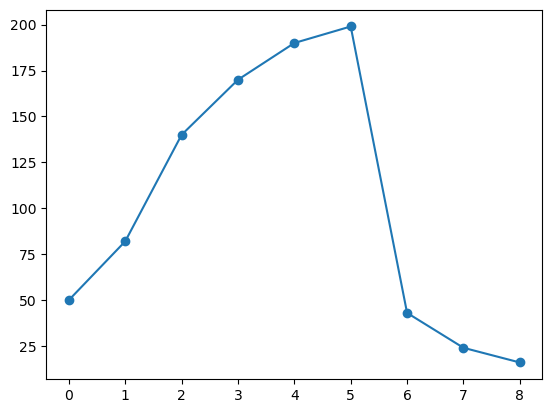

In [12]:
plt.plot(scan_queue,marker = 'o')